In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, cohen_kappa_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import cohen_kappa_score

In [3]:
# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")


In [4]:
# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

In [5]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [6]:
# Apply SMOTE to your dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [7]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [8]:
# Initialize and fit a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Make predictions
y_pred = clf.predict(X_test)

In [10]:
# Choose one label (e.g., 10) as the positive class
pos_label = 10

In [11]:
# Calculate Sensitivity, Specificity, ROC AUC, Accuracy, Precision, Recall, F1 Score, Kappa Statistics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=pos_label)
recall = recall_score(y_test, y_pred, pos_label=pos_label)
f1 = f1_score(y_test, y_pred, pos_label=pos_label)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
kappa = cohen_kappa_score(y_test, y_pred)

In [12]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [13]:
# Generate the classification report
class_report = classification_report(y_test, y_pred)

In [14]:
# Print all the calculated metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print(f"Kappa Statistics: {kappa}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9883982035928144
Precision: 0.9901664145234493
Recall: 0.9864355689525245
F1 Score: 0.9882974707436769
ROC AUC: 0.9988567442564075
Kappa Statistics: 0.9767947690738863
Confusion Matrix:
[[1309   18]
 [  13 1332]]
Classification Report:
              precision    recall  f1-score   support

          10       0.99      0.99      0.99      1327
          20       0.99      0.99      0.99      1345

    accuracy                           0.99      2672
   macro avg       0.99      0.99      0.99      2672
weighted avg       0.99      0.99      0.99      2672



In [15]:
# Calculate one-vs-all ROC curve
fpr, tpr, _ = roc_curve(np.where(y_test == pos_label, 1, 0), clf.predict_proba(X_test)[:, 1])

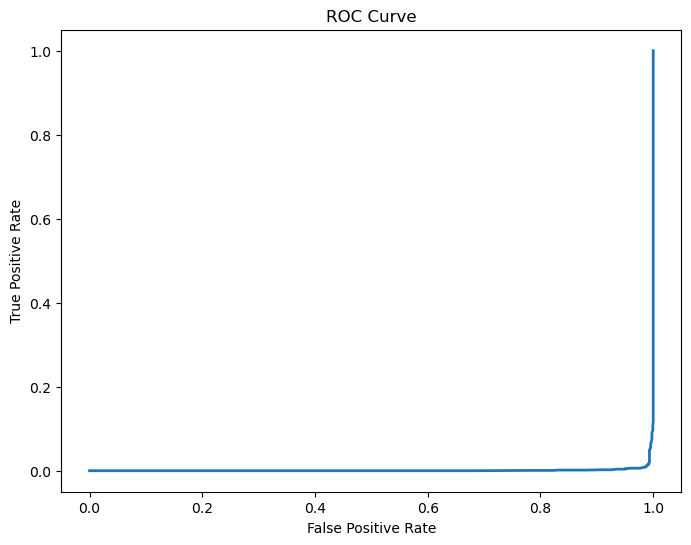

In [16]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [18]:
# Calculate sensitivity (True Positive Rate)
sensitivity = recall  # Same as recall

# Calculate specificity (True Negative Rate)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (True Positive Rate): 0.9864355689525245
Specificity (True Negative Rate): 0.9864355689525245


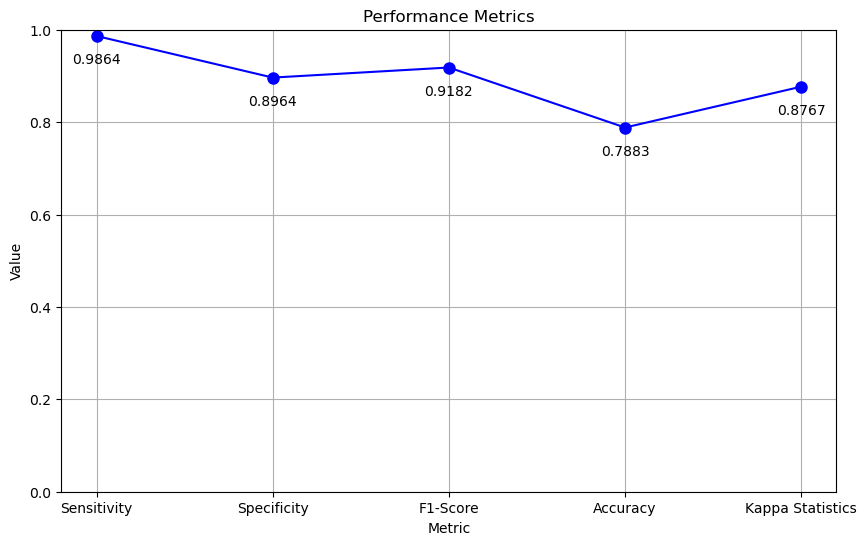

In [1]:

import matplotlib.pyplot as plt

# Define the metrics and their corresponding values
metrics = ['Sensitivity', 'Specificity', 'F1-Score', 'Accuracy', 'Kappa Statistics']
values = [0.9864, 0.8964, 0.9182, 0.7883, 0.8767]

# Define a dark blue color
dark_blue = "#00008B"  # Hex color code for dark blue

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, values, marker='o', linestyle='-', color='b', markersize=8)
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, 1.0)  # Set the y-axis range to show values touching the top
plt.grid(True)

# Add labels below the data points
for i, value in enumerate(values):
    plt.annotate(f'{value:.4f}', (metrics[i], value), textcoords="offset points", xytext=(0, -20), ha='center')

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Random Forest/line chart test data.svg", format='svg')


# Show the plot
plt.show()


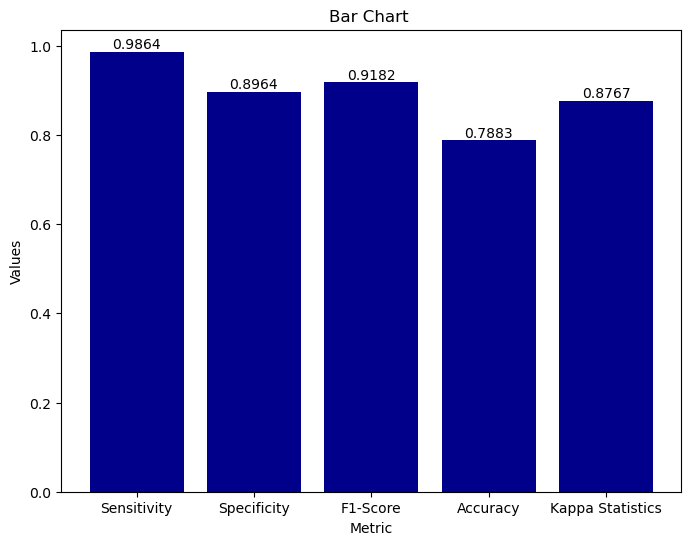

In [2]:
# Create a bar chart with dark blue color
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=dark_blue)

# Add labels and title
plt.xlabel("Metric")
plt.ylabel("Values")
plt.title("Bar Chart ")

# Add values at the middle of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Random Forest/bar chart test data.svg", format='svg')


# Show the plot
plt.show()
